# Libraries
 I import the nessecery libraries 

In [520]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm


In [5]:
sal=pd.read_csv('Salaries.csv')

In [142]:
sal

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


# Explenation of the dataset: 

- **About Dataset**: I used salaries Dataset that is contain 13 columns and 148653 row  It provides detailed salary information for employees, including their job titles and various types of components
  
- **Selected Column**: I choose `TotalPay` column that is Represents the sum of `BasePay`,`OvertimePay` and `OtherPay` corresponds to each `EmployeeName` for different `JobTitle`

- **The Reason of Selection**: `TotalPay` provides a complete view of direct compensation
more **reasonable** for salary analysis than just `BasePay`

**Dataset Structure**:
- Used `.info()` to explore the structure
- Shows each column's data type and non-null counts


In [903]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


# Descriptive Statistics

In [662]:
# Cleaning the Data from zeros and outliers
data = sal[sal['TotalPay'] > 0]
Q1 = data['TotalPay'].quantile(0.25)
Q3 = data['TotalPay'].quantile(0.75)
IQR = Q3 - Q1

df_clean = data[(data['TotalPay'] >= Q1 - 1.5 * IQR) & (data['TotalPay'] <= Q3 + 1.5 * IQR)]
filtered_data=df_clean['TotalPay'] # After filtiring it drop out to 146981 row 

**Mean of TotalPay**

In [634]:
filtered_data.mean()


73514.13734761636

**Median of TotalPay**

In [637]:
filtered_data.median()


71092.4

**Variance of TotalPay**

In [640]:
filtered_data.var()


2322627254.1705885

**Standard Deviation of TotalPay**

In [643]:
filtered_data.std()

48193.64329629571

**Standard Error of TotalPay**

In [832]:
filtered_data.sem()


125.70691256787438

### Population Standard Daviation

In order to Find  **Minimum Required Sample Size, Population Mean Confidance Interval and Hypothesis Testing** we need an estimate of the **population standard deviation (σ)** since our sample size is more than 140,000 entries which is too big 

Although a sample standard deviation can be computed from the available dataset it will not give use an accurate estimation and unsuitable for calculations

#### Calculating Population Standard Deviation approach
To overcome this limitation, we use a statistically accepted method that calculate the **population standard deviation** based on **percentile values** :

    σ= (P90-P10)/3.29

- **σ**: estimated population standard deviation  
- **P90**: 90 th percentile of the population  
- **P10**: 10 th percentile of the population  
- **3.29**: approximated number of standard deviations between the 10th and 90th percentiles in slightly skewed real world distributions (like income or salary)


### **Source for percentiles**:
To apply this estimation method, we used publicly available salary data for San Francisco from a trusted source:

  - Gusto Salary Explorer for San Francisco (June 2025)  
  - **Links**:
  -  https://gusto.com/resources/research/salary/ca/san-francisco
  - https://www.reddit.com/r/AskStatistics/comments/42gdf4/why_is_this_book_saying_there_are_329_standard/

    **Used Data**:
  - P10 = \$45,240
  -  P90 = \$195,750

---

In [846]:
# Given percentiles from Gusto (San Francisco salary data)

P10 = 45240
P90 = 195750
sigma = (P90 - P10) / 3.29
print(sigma)

45747.72036474164

# Data Visualization

**Histogram plot**:

**interpretations and observations**: 

- **Skewed Distribution**: The distribution of `TotalPay` is **right-skewed** meaning most employees earn lower salaries, and only a few earn very high salaries this is evident from the long tail stretching toward the right (higher pay values)

- **Concentration of Salaries**:A large number of employees earn between **$0 - $120,000** with the **highest concentration** around **$0–$40,000** and **$80,000–$100,000**

- **Outliers**: Extreme salaries **above $200,000** were filtered out to focus on the core distribution.


<Axes: xlabel='TotalPay', ylabel='Count'>

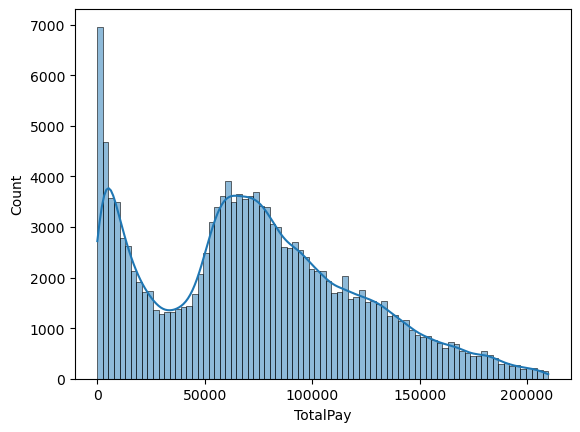

In [648]:
sns.histplot(filtered_data,kde=True)

**Box Plot:**

**interpretations and observations**: 
- **Median**:
The thick black line inside the box shows the **median** of TotalPay it looks to be around **$70,000–$80,000** meaning half the employees earn less than this and half earn more

- **Salary Distribution Range** :
The box represents **the middle 50% of the data** from the **25%(Quarter1)**  to the **75%(Quarter3)**  most employees  `TotalPay` falls between about $40,000 - $120,000

- **Typical Salary Range**:
The **horizontal lines** extend to the **smallest and largest values within 1.5 x IQR(Interquartile Range Q1,Q2,Q3,Q4)** beyond this range are considered outliers

- **Outliers**:
All the circles to the right of the Typical Salary Range are **outliers** employees with unusually high `TotalPay` some earn over $400,000–$500,000, which is much higher than the majority


<Axes: xlabel='TotalPay'>

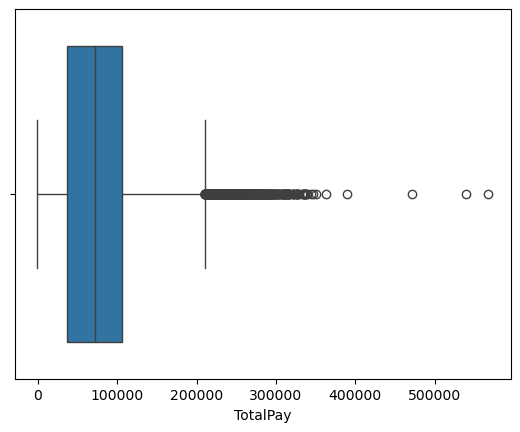

In [906]:
sns.boxplot(x='TotalPay',data=sal)


# Confidence Intervals

**confidence intervals for mean**:

We have to make sure of these **Assumptions** :

- The sample data is assumed to be **randomly selected** and **independent**
  
- For the mean: either the **sample size is large (n > 30)** or the data is approximately **normally distributed**(since dataset has appromexsently have 140800 data for large sample sizes **the Central Limit Theorem (CLT)** says the sampling distribution of **the mean becomes approximately normal** even if the original data isn’t)

  
I used **z_distribution** rather then **t_distribution** Tabel since we have population standard deviation 

The **formula** that is going to used is right below :

    CI μ= x(mean) ±z α/2 * σ/√n

where :
- x =  the mean of the data
- z ⍺/2,df =z-critical value from the z-distribution
- σ = population standard deviation
- n= sample size
- ⍺= 1-0.95=0.05

In [893]:
# used data:
    # filtered_data
    # sigma (Populaiton std)

# Sample statistics

n = len(filtered_data) # size of the data
mean = np.mean(filtered_data)
print(f"The avrage salary for all employees is {mean}\n")
standard_error = sigma / np.sqrt(n)       # standard error

# 95% confidence interval using z-distribution

confidence = 0.95
alpha=1-confidence

# finding t value from the tabel

z_crit = stats.norm.ppf(1 - 0.05/2)

# finding  upper and lower intervals
ci_mean_lower = mean - z_crit * standard_error
ci_mean_upper = mean + z_crit * standard_error
print(f"95% Confidence Interval for Mean:({ci_mean_lower} , {ci_mean_upper})\n")


print(f"Based on the sample the average salary (mean) is approximately ${mean:.2f}\nwe estimate that the true average salary for all employees lies between (${ci_mean_lower:.2f} , ${ci_mean_upper:.2f}) \nwith 95% confidence")


The avrage salary for all employees is 73514.13734761636

95% Confidence Interval for Mean:(73280.26065160471 , 73748.014043628)

Based on the sample the average salary (mean) is approximately $73514.14
we estimate that the true average salary for all employees lies between ($73280.26 , $73748.01) 
with 95% confidence


---

**confidence intervals for variance**:

I used **chi-squared distribution** Tabel which models the distribution of sample variances because variance isn't normally distributed

The **formula** that is going to used is right below :

    CI variance=((n−1)*(s**2)/Xlower(1-α/2) ,(n−1)*(s**2)/Xupper(α/2))

where:
- n= sampel size
- s**2= sampel vairance
- n-1= Degrees of freedom (df)
- Xlower(1-α/2), Xupper(α/2)= critical values from chi-squared distribution Table


In [889]:
# used data:
    # filtered data

# Sample statistics

n = len(filtered_data) #size of the data
df = n - 1
sample_variance = np.var(filtered_data, ddof=1) #variance of the data

print(f"The variance of all employees is {sample_variance}\n")

# Confidence level
confidence = 0.95
alpha = 1 - confidence

# Chi-squared Tabel critical values
chi2_upper = stats.chi2.ppf(alpha / 2, df)
chi2_lower = stats.chi2.ppf(1 - alpha / 2, df)

# Confidence interval for the variance
chi_var_lower =df*sample_variance/chi2_lower
chi_var_upper =df*sample_variance/chi2_upper
print(f"95% Confidence Interval for Variance:({chi_var_lower}, {chi_var_upper})\n")

print(f"Based on the sample the variance of TotalPay is approximately {sample_variance:.2f}\nwe estimate that the true population variance of employee salaries lies between ({chi_var_lower:.2f},{chi_var_upper:.2f})\nwith 95% confidence")

The variance of all employees is 2322627254.1705885

95% Confidence Interval for Variance:(2305925877.0254383, 2339511582.039116)

Based on the sample the variance of TotalPay is approximately 2322627254.17
we estimate that the true population variance of employee salaries lies between (2305925877.03,2339511582.04)
with 95% confidence


---

# Sample Size Estimation

### Fisrt way

#### Minimum Sample Size for Estimating a Mean(Z Table)

            n=(Z⋅σ/E)**2
    
- **n**: minimum required sample size  
- **Z**: Z-score corresponding to the desired confidence level  
  - For 90% confidence: Z nearly equal to 1.645  
- **σ**: estimated population standard deviation
- **E**: margin of error (maximum acceptable error), here E = 0.1  

These formulas are used when the full population data is not available and an estimate is needed based on known percentiles and desired confidence in the results.


In [844]:
# Used Data
    #sigma(Population Std)

Z =z_score = norm.ppf(1 - (1 - confidence) / 2 )  # Z-score for 90% confidence
E = 0.1   

# Calculate minimum required sample size
n_required = (Z * sigma / E) ** 2

print(f"Estimated population standard deviation : ${sigma:,.2f}\n")
print(f"Required minimum sample size : {n_required:,.0f}\n")
print(f"To estimate the population mean TotalPay with a margin of error of 0.1 and 90% confidence \nwe need at least {n_required:,.0f} employees in our sample.")



Estimated population standard deviation : $45,747.72

Required minimum sample size : 566,230,721,977

To estimate the population mean TotalPay with a margin of error of 0.1 and 90% confidence 
we need at least 566,230,721,977 employees in our sample.


---

### Second Way: Using Sample Standard Deviation

In case a reliable external source for the **population standard deviation (σ)** is not available, an alternative approach is to use the **sample standard deviation (S)** calculated from the dataset.

Although this method is not as accurate it provides a useful approximation 

---
Using the follwoing **formula**:
    
        n=(Z⋅S/E)**2

where:

- n = required sample size
- Z = Z-score for your confidence level from Z_Tables
    - For 90% confidence: Z nearly equal to 1.645  
- S = sample standard deviation
- E = margin of error E= 0.1
        

In [823]:
# Used Data
    # filtered_data

# variables
confidence = 0.90
margin_of_error = 0.1
std_dev = np.std(filtered_data)

# z-value for 90% confidence nearly equal to 1.645
z_score = norm.ppf(1 - (1 - confidence) / 2)


n_required = (z_score * std_dev / margin_of_error) ** 2

# Round up to nearest number since it isn't make sense to be float value
n_required = int(np.ceil(n_required))
print(f"Estimated Sample standard deviation : ${std_dev:,.2f}\n")
print(f"Minimum required sample size: {n_required:,.0f}\n")
print(f"To estimate the population mean TotalPay with a margin of error of 0.1 and 90% confidence \nwe need at least {n_required:,.0f} employees in our sample.")


Estimated Sample standard deviation : $48,193.48

Minimum required sample size: 628,392,621,022

To estimate the population mean TotalPay with a margin of error of 0.1 and 90% confidence 
we need at least 628,392,621,022 employees in our sample.


---

# Hypothesis Testing

### We are testing the following hypotheses:

    Is the average TotalPay different from $74,000?
    
- **Null Hypothesis (H0)**: The true average salary (TotalPay) is $74,000
   
- **Alternative Hypothesis (H1)**: The true average salary is not $74,000

- **Graph Type**: Two Tailed Graph
---

### Assumptions:

- Confidence level: **95%** --> significance level **⍺ = 0.05**

---
### Method: 

- Since population standard deviation is known we use **z-distribution**.

So We use the following formula In order to find the ranges of accepted part in the graph:

        CI μ= x(mean) -mu_0 * sigma/√n


**Where:**

- x = sample mean  
- sigma = population standard deviation  
- n = sample size
- mu_0= Hypothesized mean
- s/√n = standard error of the mean



---
### Decision :

We decided If the hypothesized mean \( mu_0 = 74,000 \) lies **inside** the confidence interval then it Fail to reject H0. If \( mu_0 \) lies **outside** the confidence interval → **Reject H0**

---
### Interpretation:

Based on the sample the average salary (mean) is approximately **\$74,954.38**
We estimate that the **true average salary** for all employees lies between **\$74,697.64** and **\$75,211.12** with 95% confidence
Therefore we conclude that the average employee salary is **significantly different** from \$74,000



1.959963984540054
Z = -4.07 lies outside ±1.96 → Reject H₀


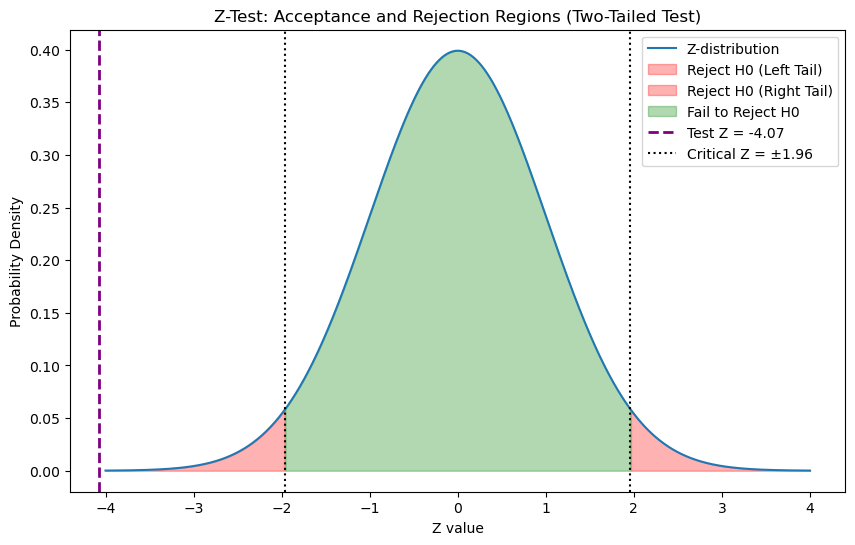

In [900]:
# used data:
    # filtered_data
    # sigma(populatoin standard daviation) From Sample Size Estimation Part

# needed variables
n = len(filtered_data)
mean_sample = np.mean(filtered_data)
alpha = 0.05
se = sigma / np.sqrt(n)

# Critical z-value from Z table
z_crit = norm.ppf(1 - (1 - confidence) / 2)

print(z_score)

# Hypothesized mean
mu_0 = 74000

# Test Z
test_z= (mean_sample-mu_0)/se
z_range = np.linspace(-4, 4, 1000)
y = norm.pdf(z_range)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(z_range, y, label='Z-distribution')

# Shade the rejection regions
plt.fill_between(z_range, y, where=(z_range <= -z_crit), color='red', alpha=0.3, label='Reject H0 (Left Tail)')
plt.fill_between(z_range, y, where=(z_range >= z_crit), color='red', alpha=0.3, label='Reject H0 (Right Tail)')

# Shade the acceptance region
plt.fill_between(z_range, y, where=(z_range > -z_crit) & (z_range < z_crit), color='green', alpha=0.3, label='Fail to Reject H0')

# Mark the test z-value
plt.axvline(test_z, color='purple', linestyle='--', linewidth=2, label=f'Test Z = {test_z:.2f}')

# Labels and decorations
plt.title('Z-Test: Acceptance and Rejection Regions (Two-Tailed Test)')
plt.xlabel('Z value')
plt.ylabel('Probability Density')
plt.axvline(-z_crit, color='black', linestyle=':', label=f'Critical Z = ±{z_crit:.2f}')
plt.axvline(z_crit, color='black', linestyle=':')
plt.legend()

if -z_crit <= test_z <= z_crit:
    print(f"Z = {test_z:.2f} lies between ±{z_crit:.2f} → Fail to reject H₀")
else:
    print(f"Z = {test_z:.2f} lies outside ±{z_crit:.2f} → Reject H₀")
